In [1]:
using CSV
using DataFrames
using Plots
using StatsPlots
using GLM
using Statistics
using Distributions
using Random
using MultivariateStats
using LIBSVM

## This notebook has strong inspiration from [ISLR-python](https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%209.ipynb)

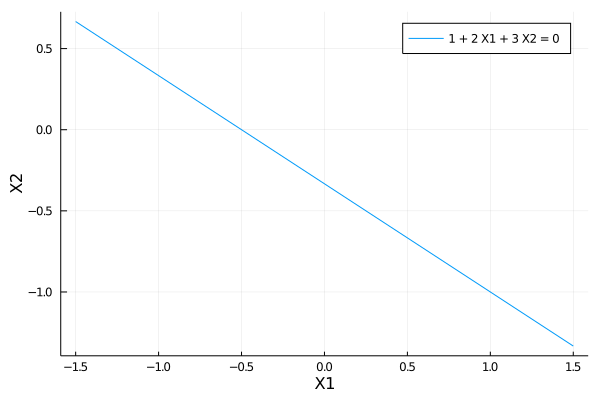

In [2]:
# Figure 9.1
X1 = [-1.5, 1.5]
X2 = [2.0/3.0, -4.0/3.0]
plot(X1, X2, xlabel="X1", ylabel="X2", label="1 + 2 X1 + 3 X2 = 0")

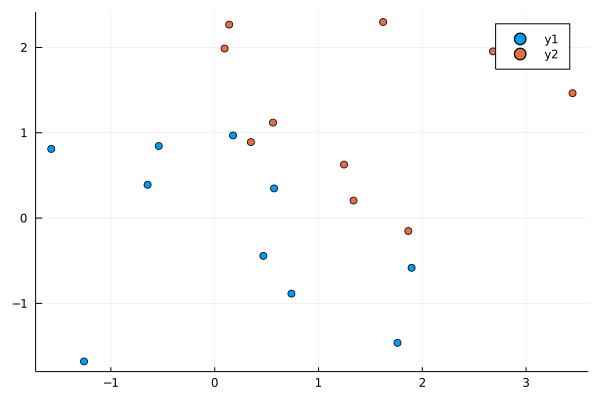

In [3]:
x = randn(20, 2)
labels = repeat([-1, 1], 10)
x[labels .== -1, :] = x[labels .== -1, :] .+ 1

scatter(x[labels .== 1, 1], x[labels .== 1, 2])
scatter!(x[labels .== -1, 1], x[labels .== -1, 2], xlabel="X1", ylabel="X2")

In [4]:
function plot_svc(model, x, y, h=0.02, pad=0.25)
    x_min = minimum(x[:, 1]) - pad
    x_max = maximum(x[:, 1]) + pad
    y_min = minimum(x[:, 2]) - pad
    y_max = maximum(x[:, 2]) + pad
    
    xx = x_min:h:x_max
    yy = y_min:h:y_max
    
    f(i, j) = begin 
        c = reshape([i; j], (2, 1))
        pred = svmpredict(model, c) 
        if pred[2][1] < 0
            return -1
        end
        return 1
    end
    
    contour(xx, yy, f, fill = true)
end

plot_svc (generic function with 3 methods)

In [6]:
model = svmtrain(x', labels,  kernel=Kernel.Linear)

LIBSVM.SVM{Int64}(SVC, LIBSVM.Kernel.Linear, nothing, 2, 2, [-1, 1], Int32[1, 2], Float64[], Int32[], LIBSVM.SupportVectors{Int64,Float64}(10, Int32[5, 5], [-1, -1, -1, -1, -1, 1, 1, 1, 1, 1], [0.5619454406636804 0.3488368485140593 … 1.7610768109132122 -0.5390546959903736; 1.1190717682609719 0.8905676031637255 … -1.462309817246052 0.8446998890680568], Int32[1, 7, 11, 17, 19, 2, 4, 8, 10, 18], LIBSVM.SVMNode[LIBSVM.SVMNode(1, 0.5619454406636804), LIBSVM.SVMNode(1, 0.3488368485140593), LIBSVM.SVMNode(1, 1.865832273149916), LIBSVM.SVMNode(1, 1.2465220798764312), LIBSVM.SVMNode(1, 1.3377949807092382), LIBSVM.SVMNode(1, 0.5722367811060431), LIBSVM.SVMNode(1, 1.8970253945708542), LIBSVM.SVMNode(1, 0.1767107607950541), LIBSVM.SVMNode(1, 1.7610768109132122), LIBSVM.SVMNode(1, -0.5390546959903736)]), 0.0, [1.0; 1.0; … ; -0.343325137976408; -0.6885740126979735], Float64[], Float64[], [1.3863834535224921], 3, 0.5, 200.0, 0.001, 1.0, 0.5, 0.1, true, false)

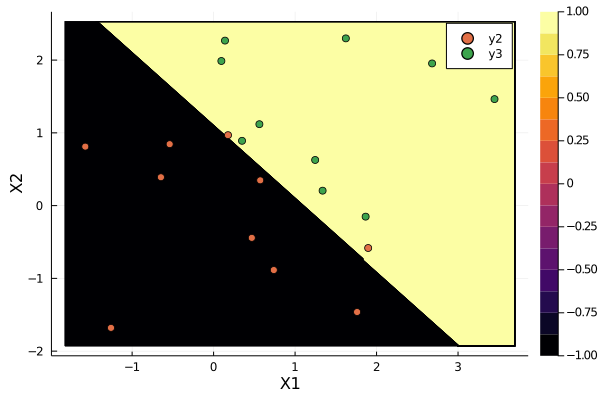

In [7]:
plot_svc(model, x, labels)
scatter!(x[labels .== 1, 1], x[labels .== 1, 2])
scatter!(x[labels .== -1, 1], x[labels .== -1, 2], xlabel="X1", ylabel="X2")

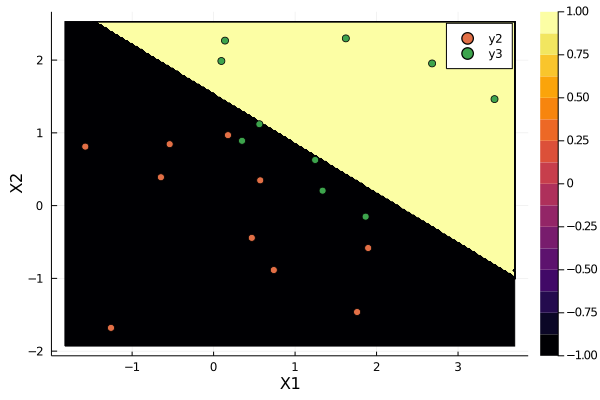

In [8]:
model = svmtrain(x', labels,  kernel=Kernel.Linear, cost=0.1)

plot_svc(model, x, labels)
scatter!(x[labels .== 1, 1], x[labels .== 1, 2])
scatter!(x[labels .== -1, 1], x[labels .== -1, 2], xlabel="X1", ylabel="X2")

In [9]:
x = randn(20, 2)
labels = repeat([-1, 1], 10)
x[labels .== -1, :] = x[labels .== -1, :] .+ 5

10×2 Array{Float64,2}:
 4.62623  5.83517
 5.11895  5.1316
 4.11709  6.64651
 2.16258  5.77153
 3.60996  5.26811
 5.72187  4.4572
 6.37056  4.45886
 5.35572  3.79251
 3.38903  8.14114
 4.38173  5.60279

In [10]:
model = svmtrain(x', labels,  kernel=Kernel.Linear)

LIBSVM.SVM{Int64}(SVC, LIBSVM.Kernel.Linear, nothing, 2, 2, [-1, 1], Int32[1, 2], Float64[], Int32[], LIBSVM.SupportVectors{Int64,Float64}(2, Int32[1, 1], [-1, 1], [2.1625823939843034 -0.7291356975526773; 5.771533257558114 2.714922315434204], Int32[7, 2], LIBSVM.SVMNode[LIBSVM.SVMNode(1, 2.1625823939843034), LIBSVM.SVMNode(1, -0.7291356975526773)]), 0.0, [0.11296305277853795; -0.11296305277853795], Float64[], Float64[], [1.6992419834574224], 3, 0.5, 200.0, 0.001, 1.0, 0.5, 0.1, true, false)

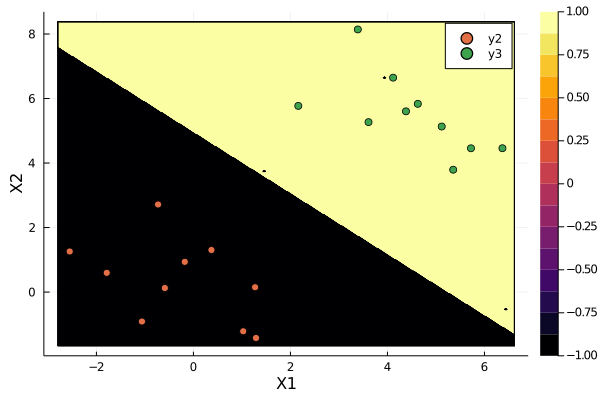

In [11]:
plot_svc(model, x, labels)
scatter!(x[labels .== 1, 1], x[labels .== 1, 2])
scatter!(x[labels .== -1, 1], x[labels .== -1, 2], xlabel="X1", ylabel="X2")

## SVM with non-linear kernel

In [12]:
X = randn(2, 200)
X[:, 1:100] = X[:, 1:100] .+ 2
X[:, 101:150] = X[:, 101:150] .- 2

labels = vcat(repeat([-1], 150), repeat([1], 50))

200-element Array{Int64,1}:
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
  ⋮
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1

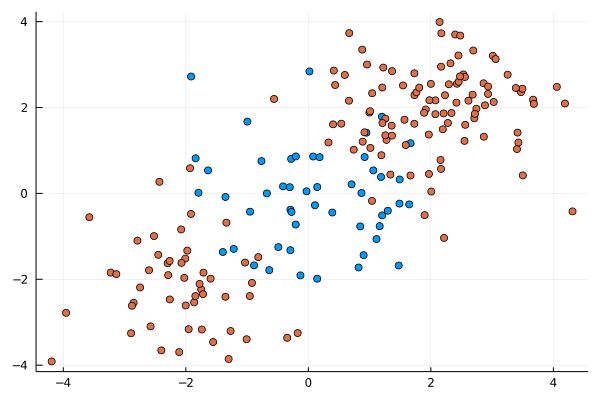

In [13]:
scatter(X[1, labels .== 1], X[2, labels .== 1])
scatter!(X[1, labels .== -1], X[2, labels .== -1], legend=false)

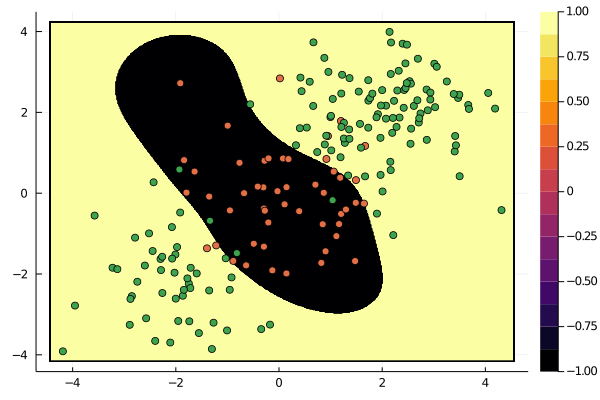

In [14]:
model = svmtrain(X, labels) # default kernel is RadialBasis

plot_svc(model, X', labels)
scatter!(X[1, labels .== 1], X[2, labels .== 1])
scatter!(X[1, labels .== -1], X[2, labels .== -1], legend=false)

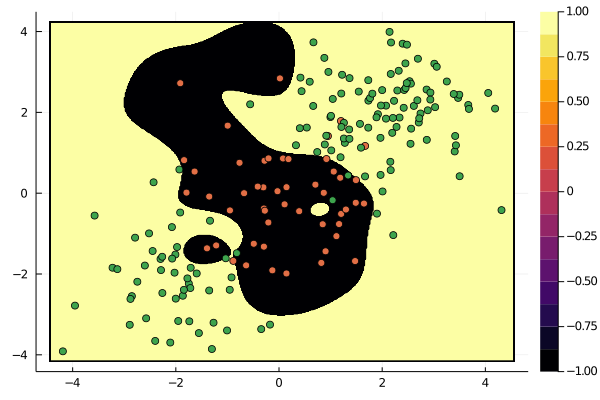

In [17]:
model = svmtrain(X, labels, cost=100.0, gamma=1.0) # default kernel is RadialBasis

plot_svc(model, X', labels)
scatter!(X[1, labels .== 1], X[2, labels .== 1])
scatter!(X[1, labels .== -1], X[2, labels .== -1], legend=false)